In [2]:
import pandas as pd

data = pd.read_csv('reviews.csv')
data = data.head(30000)
data.tail(5)

,Time_submitted,Review,Rating,Total_thumbsup,Reply
29995,2022-04-23 20:03:35,"When I play music on my playstation (4 and 5),...",3,0,NaN
29996,2022-04-23 19:51:42,Absolutely brilliant Playlists,5,0,NaN
29997,2022-04-23 19:49:46,what is this behavior spotify...??? every time...,1,0,NaN
29998,2022-04-23 19:45:41,Great interface and setup...,5,0,NaN
29999,2022-04-23 19:42:41,this app is so trash. it is impossible to do a...,1,4,NaN


In [3]:
data.iloc[4,1]

"Dear Spotify ...  why do I get songs that I didn't put on my playlist??? And why do we have shuffle play?"

In [4]:
data.isnull().sum()
       

Time_submitted        0
Review                0
Rating                0
Total_thumbsup        0
Reply             29927
dtype: int64

In [5]:
data.drop(['Time_submitted', 'Reply'], axis=1, inplace=True)
data.isnull().sum()

Review            0
Rating            0
Total_thumbsup    0
dtype: int64

<AxesSubplot: xlabel='Rating', ylabel='count'>

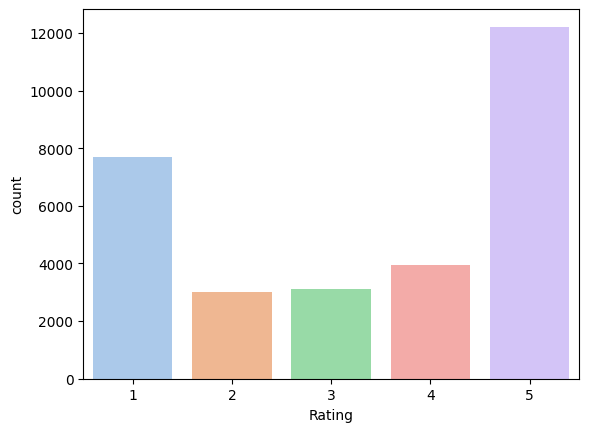

In [6]:
import seaborn as sns
sns.countplot(x='Rating', data=data, palette='pastel')

In [7]:
def transform_ratings(rating):
    if rating == 5 or rating == 4:
        return "Good"
    if rating == 3:
        return "Neutral"
    if rating == 2 or rating == 1:
        return "Bad"

,Review,Rating,Total_thumbsup,Desc,length
0,"Great music service, the audio is high quality...",5,2,Good,112
1,Please ignore previous negative rating. This a...,5,1,Good,86
2,"This pop-up ""Get the best Spotify experience o...",4,0,Good,106
3,Really buggy and terrible to use as of recently,1,1,Bad,47
4,Dear Spotify ... why do I get songs that I di...,1,1,Bad,105


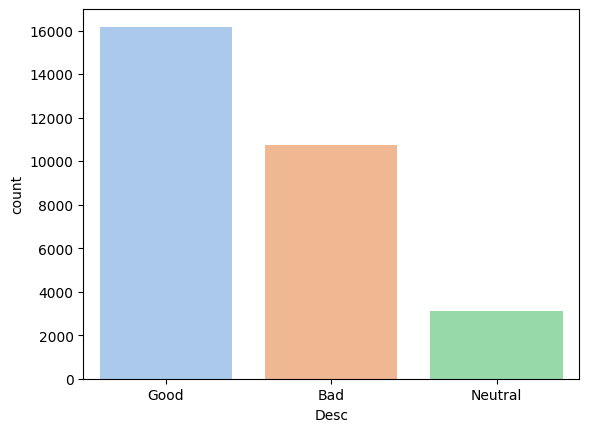

In [8]:
data['Desc'] = data['Rating'].apply(transform_ratings)
data['length'] = data['Review'].str.len()
sns.countplot(x='Desc', data=data, palette='pastel')
data.head()

<AxesSubplot: xlabel='length', ylabel='Total_thumbsup'>

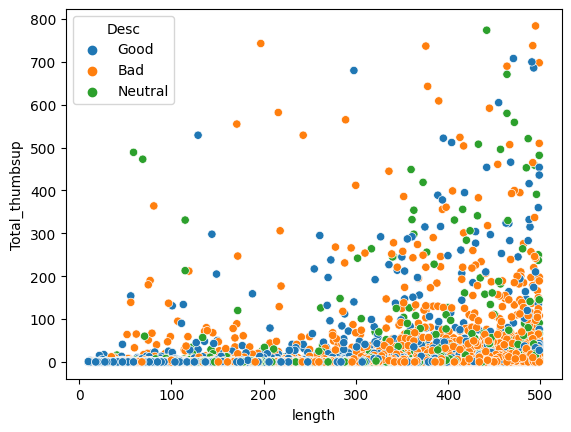

In [9]:
sns.scatterplot(x=data['length'][data.length < 500], y=data['Total_thumbsup'][data.Total_thumbsup < 800], hue=data['Desc'])

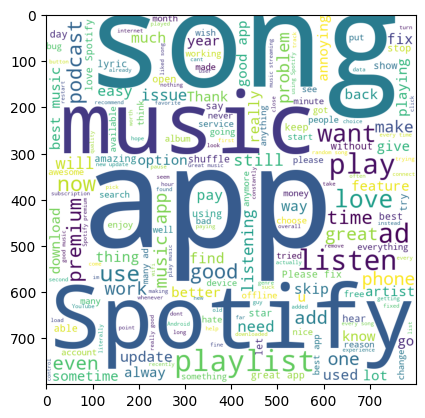

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

reviews = " ".join(data.loc[:,'Review'])
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(reviews)
plt.imshow(wordcloud) 


In [11]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda word: re.sub('[^a-z A-Z 0-9-]+', '', word))

stop_words = stopwords.words('english')
data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda word: " ".join(word for word in word.split() if word not in stop_words))

stemmer = PorterStemmer()
data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda word: " ".join(stemmer.stem(word) for word in word.split()))
data.head()["Review"] 


0    great music servic audio high qualiti app easi...
1    pleas ignor previou neg rate app super great g...
2    pop-up get best spotifi experi android 12 anno...
3                      realli buggi terribl use recent
4    dear spotifi get song didnt put playlist shuff...
Name: Review, dtype: object

In [12]:
# import re
# data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda word: re.sub('[^a-z A-Z 0-9-]+', '', word))
# data.head()["Review"]

In [13]:
# from nltk.corpus import stopwords
# stop_words = stopwords.words('english')
# data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda word: " ".join(word for word in word.split() if word not in stop_words))
# data.head()["Review"]

In [14]:
# from nltk.stem import WordNetLemmatizer
# lemmat = WordNetLemmatizer()
# data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda word: " ".join(lemmat.lemmatize(word) for word in word.split()))
# data.head()["Review"]


# from nltk.stem import PorterStemmer
# stemmer = PorterStemmer()

# data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda word: " ".join(stemmer.stem(word) for word in word.split()))
# data.head()["Review"]

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report



X = data['Review']
y = data['Desc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# y_train.head()

((22500,), (7500,), (22500,), (7500,))

In [16]:
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)
y_train

array([1, 1, 1, ..., 1, 1, 0])

In [17]:
cv = CountVectorizer()
cv.fit(X_train)
X_train_count = cv.transform(X_train)
X_test_count = cv.transform(X_test)
print(X_train_count)

  (0, 3238)	1
  (0, 3300)	2
  (0, 3915)	1
  (0, 5312)	1
  (0, 5667)	1
  (0, 5770)	1
  (0, 5771)	1
  (0, 8339)	1
  (0, 9393)	1
  (0, 9775)	1
  (0, 9847)	1
  (1, 795)	1
  (1, 1131)	1
  (1, 3698)	1
  (1, 4171)	1
  (1, 4487)	1
  (1, 5098)	1
  (1, 7952)	1
  (1, 11212)	1
  (2, 668)	1
  (2, 2147)	1
  (2, 3861)	1
  (2, 4517)	1
  (2, 5187)	1
  (2, 5412)	1
  :	:
  (22497, 6871)	1
  (22497, 7674)	2
  (22497, 7708)	1
  (22497, 8502)	1
  (22497, 8997)	1
  (22497, 9127)	1
  (22497, 9393)	3
  (22497, 9923)	1
  (22497, 10305)	1
  (22497, 10874)	1
  (22497, 11454)	1
  (22498, 3270)	1
  (22498, 3544)	1
  (22498, 4590)	1
  (22498, 5418)	1
  (22498, 7229)	1
  (22498, 8197)	1
  (22498, 9256)	1
  (22498, 10339)	1
  (22499, 1464)	1
  (22499, 2143)	1
  (22499, 4427)	1
  (22499, 5372)	1
  (22499, 6567)	1
  (22499, 7133)	1


In [18]:
tfidf = TfidfVectorizer(analyzer='char', ngram_range=(2,3))
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
print(X_train_tfidf)

  (0, 9801)	0.1611680812424819
  (0, 9793)	0.15612197572933384
  (0, 9181)	0.09940095961304855
  (0, 9173)	0.07384292539111476
  (0, 9042)	0.12832673998126956
  (0, 9038)	0.06500640010175625
  (0, 8901)	0.0828600504737942
  (0, 8887)	0.03707729609945748
  (0, 8838)	0.11074853174017249
  (0, 8837)	0.06437317767121703
  (0, 8819)	0.08470155033089796
  (0, 8732)	0.05201377505308044
  (0, 8725)	0.060454261060461735
  (0, 8722)	0.0815413378680683
  (0, 8717)	0.07494175939929815
  (0, 8702)	0.10488867037127933
  (0, 8647)	0.09583967634662735
  (0, 8638)	0.08187599203306832
  (0, 8634)	0.055266156722047675
  (0, 8628)	0.04176657008898285
  (0, 8627)	0.12387021861371503
  (0, 8568)	0.042604713437173466
  (0, 8554)	0.03694541749374239
  (0, 8551)	0.07787888654926492
  (0, 8541)	0.07689791531386064
  :	:
  (22499, 4586)	0.10222268078880288
  (22499, 4117)	0.09649595741543592
  (22499, 4116)	0.08000342331319464
  (22499, 3362)	0.14399192796656132
  (22499, 3348)	0.057197384773171274
  (22499, 309

In [19]:
rf1 = RandomForestClassifier()
rf1.fit(X_train_count, y_train)
rf_cv = rf1.score(X_test_count, y_test)
print(f'Random Forest Classifier on Count Vectors: {rf_cv}')

Random Forest Classifier on Count Vectors: 0.772


In [20]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20, 50, 300]}

# rf1 = RandomForestClassifier()
# grid_search = GridSearchCV(rf1, param_grid, cv=3, scoring='accuracy')
# grid_search.fit(X_train_count, y_train)

# print(grid_search.best_params_)
# rf_cv = grid_search.score(X_test_count, y_test)
# print(f'Random Forest Classifier on Count Vectors after Hyperparameter Tuning: {rf_cv}')

In [21]:
# from sklearn.model_selection import RandomizedSearchCV
# import random

# param_dist = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 500]}

# # rf1 = RandomForestClassifier()
# random_search = RandomizedSearchCV(rf1, param_distributions=param_dist, n_iter=5, cv=5, scoring='accuracy')
# random_search.fit(X_train_count, y_train)

# print(random_search.best_params_)
# rf_cv = random_search.score(X_test_count, y_test)
# print(f'Random Forest Classifier on Count Vectors after RandomizedSearchCV: {rf_cv}')


In [22]:
# from sklearn.feature_selection import SelectKBest, chi2

# # Select top 'k' features from count vectors
# k = 1000
# selector = SelectKBest(chi2, k=k)
# X_train_count_new = selector.fit_transform(X_train_count, y_train)
# X_test_count_new = selector.transform(X_test_count)

# # Train Random Forest classifier on selected features
# rf1 = RandomForestClassifier()
# rf1.fit(X_train_count_new, y_train)
# rf_cv = rf1.score(X_test_count_new, y_test)
# print(f'Random Forest Classifier on Count Vectors with top {k} features: {rf_cv}')


In [23]:
rf2 = RandomForestClassifier()
rf2.fit(X_train_tfidf, y_train)
rf_tfidf = rf2.score(X_test_tfidf, y_test)
print(f'Random Forest Classifier on TF-IDF : {rf_tfidf}')

Random Forest Classifier on TF-IDF : 0.7518666666666667


In [24]:
# # Feature Engineering using features selection technique
# from sklearn.feature_selection import SelectKBest, mutual_info_classif

# selector = SelectKBest(score_func=mutual_info_classif, k=5000)
# X_train_tfidf_new = selector.fit_transform(X_train_tfidf, y_train)
# X_test_tfidf_new = selector.transform(X_test_tfidf)

# rf2 = RandomForestClassifier()
# rf2.fit(X_train_tfidf_new, y_train)
# rf_tfidf = rf2.score(X_test_tfidf_new, y_test)
# print(f'Random Forest Classifier on TF-IDF Vectors after Feature Selection: {rf_tfidf}')

In [25]:
mnb1 = MultinomialNB()
mnb1.fit(X_train_count, y_train)
mnb_cv = mnb1.score(X_test_count, y_test)
print(f'M Naive Bayes Classifier on CV: {mnb_cv}')

M Naive Bayes Classifier on CV: 0.7758666666666667


In [26]:
# from sklearn.model_selection import GridSearchCV

# # mnb1 = MultinomialNB()
# param_grid = {'alpha': [0.1, 0.5, 1, 2, 5]}
# grid_search = GridSearchCV(mnb1, param_grid, cv=5)
# grid_search.fit(X_train_count, y_train)
# mnb_cv = grid_search.score(X_test_count, y_test)
# print(f'Multinomial Naive Bayes Classifier with GridSearchCV on Count Vectors: {mnb_cv}')
# print("Best hyperparameters: ",grid_search.best_params_)

In [27]:
# # Cross Validation 


# from sklearn.model_selection import cross_val_score

# # mnb1 = MultinomialNB()
# scores = cross_val_score(mnb1, X_train_count, y_train, cv=5)
# mnb_cv = scores.mean()
# print(f'Multinomial Naive Bayes Classifier on Count Vectors: {mnb_cv}')

In [28]:
mnb2 = MultinomialNB()
mnb2.fit(X_train_tfidf, y_train)
mnb_tfidf = mnb2.score(X_test_tfidf, y_test)
print(f'M Naive Bayes Classifier on TF-IDF : {mnb_tfidf}')

M Naive Bayes Classifier on TF-IDF : 0.7593333333333333


In [29]:

# import nltk
# from nltk.corpus import wordnet
# from nltk.tokenize import word_tokenize

# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')

# def synonym_augmentation(text):
#     words = word_tokenize(text)
#     new_words = []
#     for word in words:
#         synonyms = wordnet.synsets(word)
#         synonyms_list = [syn.lemmas()[0].name() for syn in synonyms]
#         if len(synonyms_list) > 1:
#             new_word = random.choice(synonyms_list[1:])
#             new_words.append(new_word)
#         else:
#             new_words.append(word)
#     return ' '.join(new_words)

# X_train_tfidf_aug = [synonym_augmentation(text) for text in X_train]
# tfidf = TfidfVectorizer(analyzer='char', ngram_range=(2,3))
# tfidf.fit(X_train_tfidf_aug)
# X_train_tfidf = tfidf.transform(X_train_tfidf_aug)
# X_test_tfidf = tfidf.transform(X_test)


# mnb2 = MultinomialNB()
# mnb2.fit(X_train_tfidf, y_train)
# mnb_tfidf = mnb2.score(X_test_tfidf, y_test)
# print(f'Multinomial Naive Bayes Classifier on TF-IDF Vectors after Data Augmentation: {mnb_tfidf}')


In [30]:
# from sklearn.ensemble import BaggingClassifier

# # mnb2 = MultinomialNB()
# bagging_mnb = BaggingClassifier(base_estimator=mnb2, n_estimators=12, max_samples=0.8, max_features=0.8)
# bagging_mnb.fit(X_train_tfidf, y_train)
# mnb_tfidf = bagging_mnb.score(X_test_tfidf, y_test)
# print(f'Multinomial Naive Bayes Classifier with Bagging on TF-IDF Vectors: {mnb_tfidf}')


In [31]:
# from sklearn.model_selection import GridSearchCV

# # mnb2 = MultinomialNB()
# param_grid = {'alpha': [0.1, 0.5, 1, 2, 5]}
# grid_search = GridSearchCV(mnb2, param_grid, cv=5)
# grid_search.fit(X_train_tfidf, y_train)
# mnb_tfidf = grid_search.score(X_test_tfidf, y_test)
# print(f'Multinomial Naive Bayes Classifier with GridSearchCV on TF-IDF Vectors: {mnb_tfidf}')
# print("Best hyperparameters: ",grid_search.best_params_)

In [32]:
model = {'Model':['RF-Count', 
                  'RF-TFIDF', 
                  'MNB-Count',
                  'MNB-TFIDF'],
         'Score':[rf_cv, rf_tfidf, mnb_cv, mnb_tfidf]
         }
model_df = pd.DataFrame(model)
model_df

,Model,Score
0,RF-Count,0.772000
1,RF-TFIDF,0.751867
2,MNB-Count,0.775867
3,MNB-TFIDF,0.759333


<AxesSubplot: xlabel='Score', ylabel='Model'>

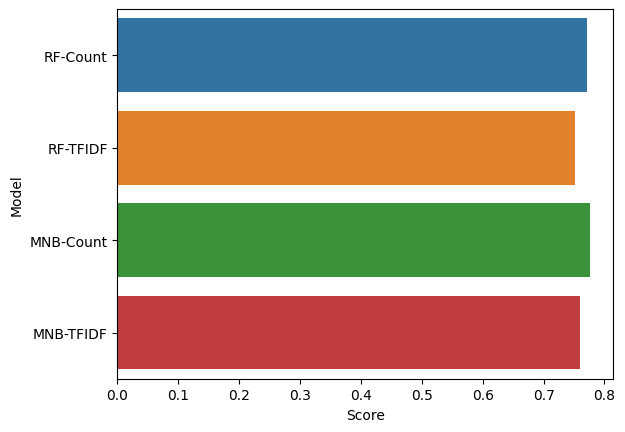

In [33]:
sns.barplot(data=model_df, y='Model', x='Score')


Text(0.5, 1.0, 'Confusion Matrix M NaiveBayes-Count')

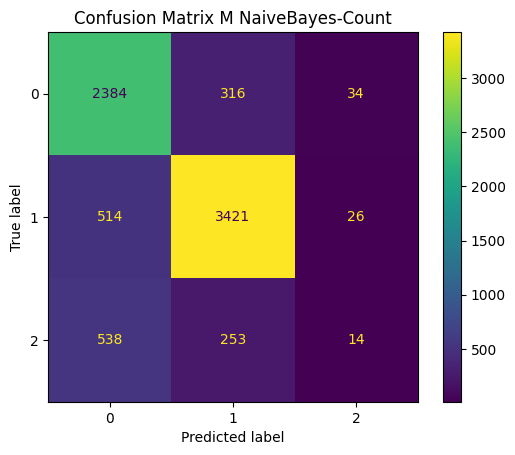

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(mnb1, X_test_count, y_test)
disp.ax_.set_title("Confusion Matrix M NaiveBayes-Count")

In [35]:
from sklearn.model_selection import GridSearchCV

mnb1_hyper = MultinomialNB()
parameters = {'alpha':[0.1, 0.5, 1.0, 4.0]}

clf = GridSearchCV(mnb1_hyper, parameters, cv=5, scoring='accuracy')
clf.fit(X_train_count, y_train)
print("best parameters: ",clf.best_params_)
mnb_hyper_cv = clf.score(X_test_count, y_test)
print(f'after hyper parameter: {mnb_hyper_cv}')

best parameters:  {'alpha': 4.0}
after hyper parameter: 0.7784


In [36]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=10000)
selector.fit(X_train_count, y_train)
top_k_indices = selector.get_support(indices=True)
X_train_kbest = X_train_count[:, top_k_indices]
X_test_kbest = X_test_count[:, top_k_indices]

mnb1_kbest = MultinomialNB()
mnb1_kbest.fit(X_train_kbest, y_train)

mnb_cv_kbest = mnb1_kbest.score(X_test_kbest, y_test)

print(f'M Naive Bayes Classifier on CV: {mnb_cv_kbest}')


M Naive Bayes Classifier on CV: 0.7749333333333334


In [37]:
from sklearn.model_selection import cross_val_score

mnb1_cross = MultinomialNB()
mnb_cross_cv = cross_val_score(mnb1_cross, X_train_count, y_train, cv=3, scoring='accuracy')
print(f'After Cross Validation: {mnb_cross_cv.mean()}')


After Cross Validation: 0.7765333333333334


In [38]:
model_after = {'Model': ['Before',
                         'Grid Search',
                         'CrossValidation',],
               'Score': [mnb_cv, mnb_hyper_cv, mnb_cross_cv.mean()]
               }
model_after_df = pd.DataFrame(model_after)
model_after_df


,Model,Score
0,Before,0.775867
1,Grid Search,0.778400
2,CrossValidation,0.776533


In [58]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(clf, f)
with open('transformer.pkl', 'wb') as f:
    pickle.dump(cv, f)
with open('le.pkl', 'wb') as f:
    pickle.dump(le, f)

In [59]:
test_reviews = ['This is a great app!',
                'No control options from my phones ',
                'I like the song selection, but the ads are annoying',
                'bad ui']
pred = clf.predict(cv.transform(test_reviews))
pred_transformed = le.inverse_transform(pred).tolist()


In [60]:
result = pd.DataFrame({'Reviews':test_reviews, 
                        'Outcome': pred_transformed})
result

,Reviews,Outcome
0,This is a great app!,Good
1,No control options from my phones,Bad
2,"I like the song selection, but the ads are ann...",Neutral
3,bad ui,Bad


<AxesSubplot: xlabel='Outcome', ylabel='count'>

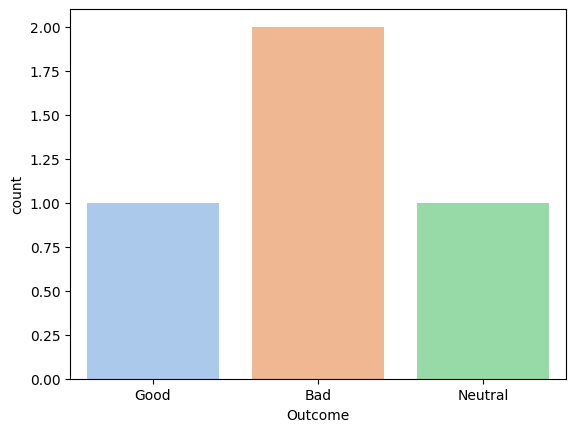

In [42]:
sns.countplot(x='Outcome', data=result, palette='pastel')